<a href="https://colab.research.google.com/github/Prax0028/UnderstandingMachineLearningAlgorithms_-PESU-IO-14/blob/main/EDA_PES2UG21CS380.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eligibility for Loans EDA
PRAGNYA VEMPATI PES2UG21CS380

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#Importing the DataSet

dataset=pd.read_csv('/content/Loan_Data.csv')
dataset.shape
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
categorical = ['Gender','Dependents','Married','Education','Self_Employed','Property_Area','Credit_History']
target = ['Loan_Status']
_id = ['Loan_ID']
numerical = [i for i in dataset.columns if i not in categorical + _id + target]

Y    422
N    192
Name: Loan_Status, dtype: int64

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64



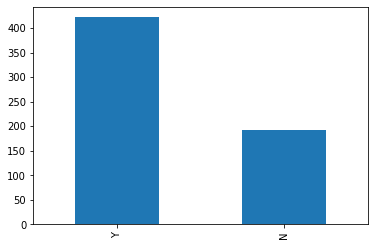

In [ ]:
print(dataset['Loan_Status'].value_counts())
print()
print(dataset['Loan_Status'].value_counts(normalize=True))
print()
dataset['Loan_Status'].value_counts().plot.bar()

In [ ]:
print(dataset['Gender'].value_counts())
print(dataset['Dependents'].value_counts())
print(dataset['Married'].value_counts())
print(dataset['Education'].value_counts())
print(dataset['Self_Employed'].value_counts())
print(dataset['Property_Area'].value_counts())
print(dataset['Credit_History'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [ ]:
print(dataset['Gender'].value_counts(normalize=True))
print(dataset['Dependents'].value_counts(normalize=True))
print(dataset['Married'].value_counts(normalize=True))
print(dataset['Education'].value_counts(normalize=True))
print(dataset['Self_Employed'].value_counts(normalize=True))
print(dataset['Property_Area'].value_counts(normalize=True))
print(dataset['Credit_History'].value_counts(normalize=True))

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


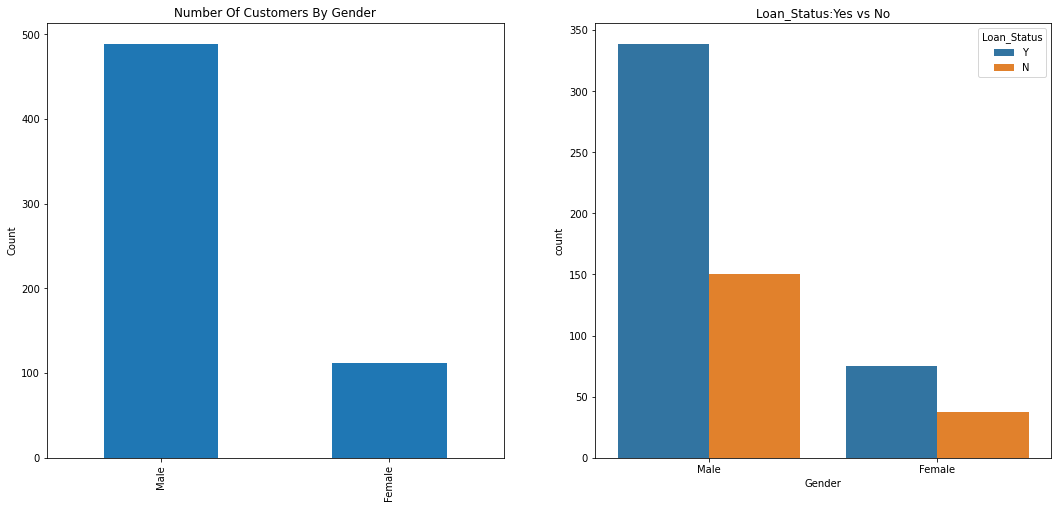

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


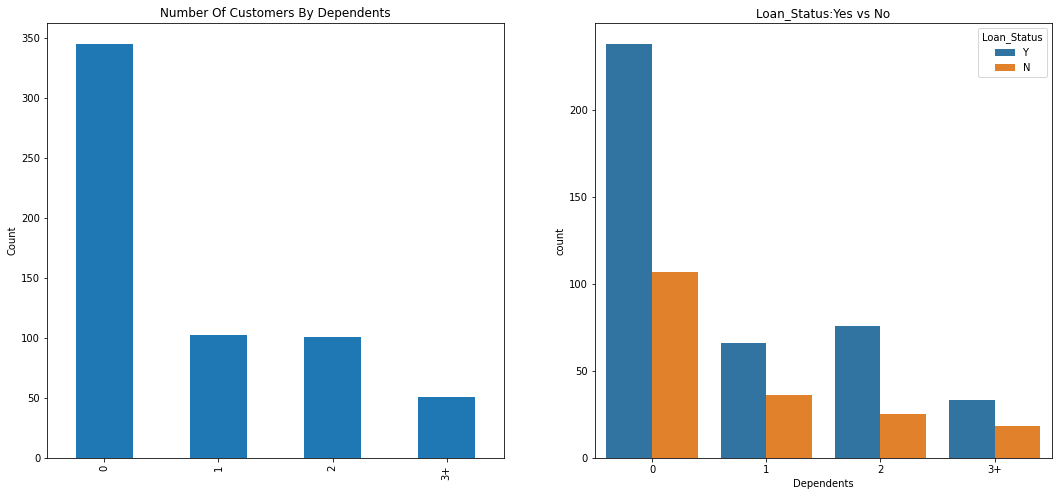

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


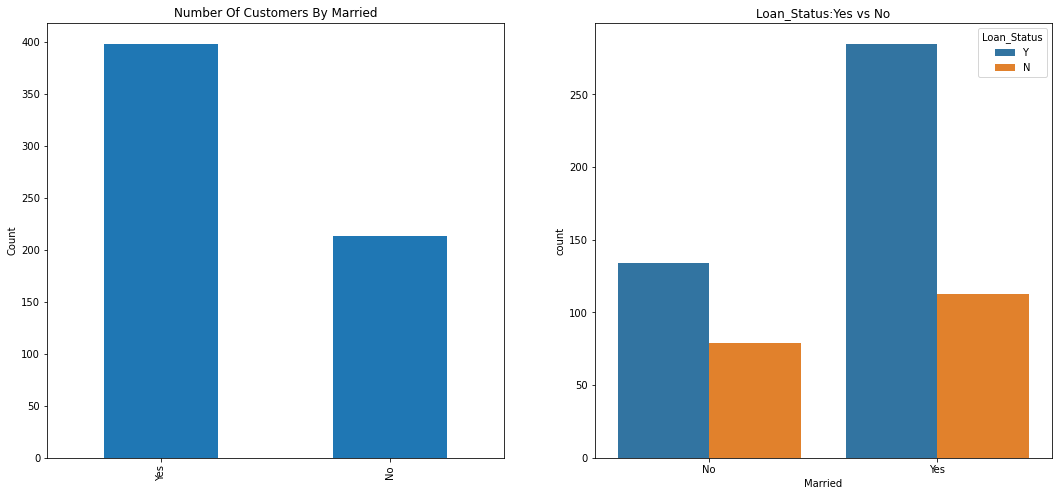

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


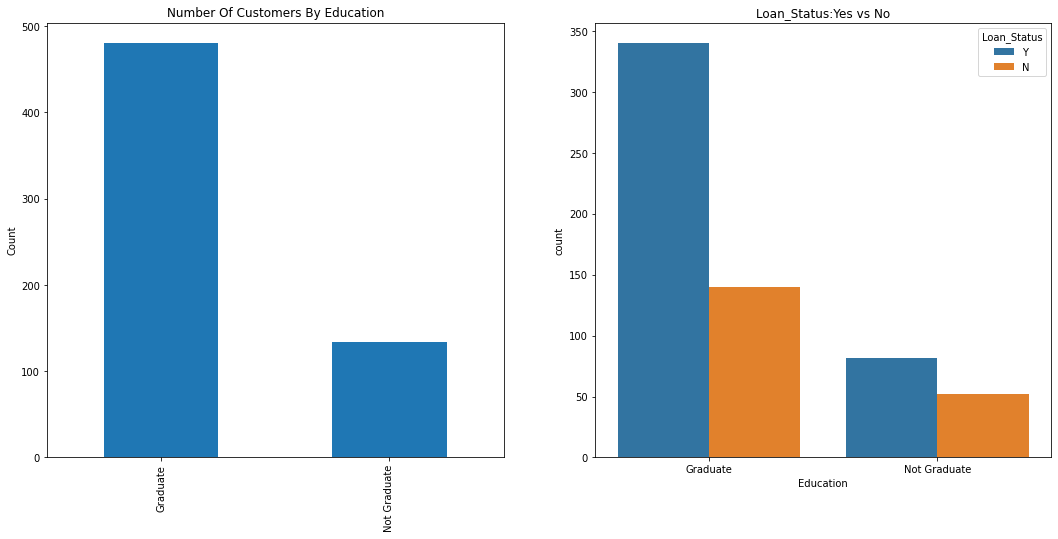

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


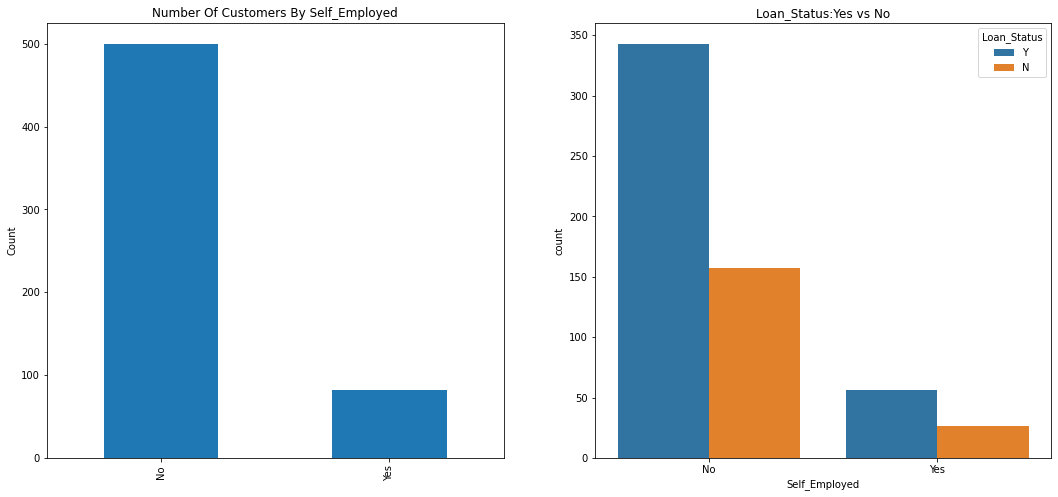

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


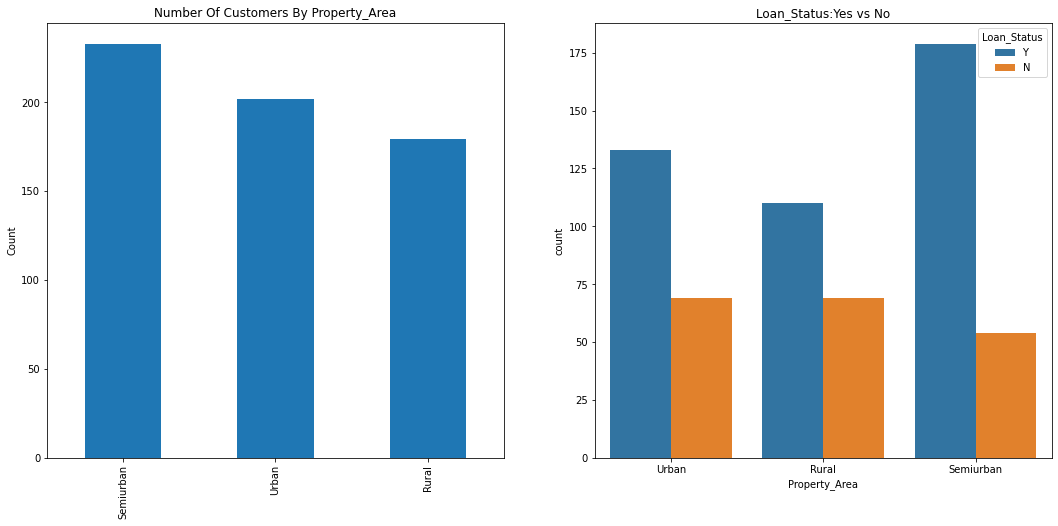

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


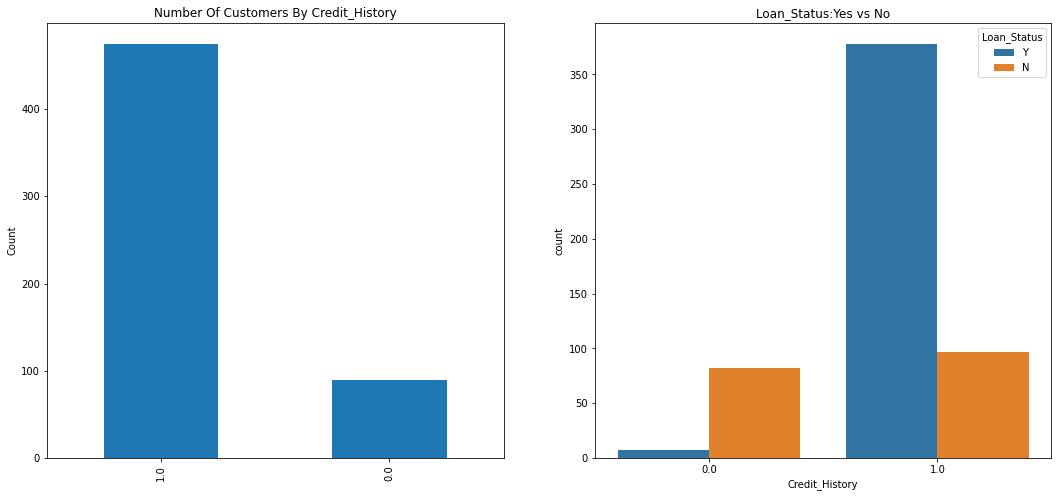

In [ ]:
for  i, col in enumerate(dataset[categorical]) :
    f,ax=plt.subplots(1,2,figsize=(18,8))
    dataset[col].value_counts().plot.bar(ax=ax[0])
    ax[0].set_title('Number Of Customers By '+str(col))
    ax[0].set_ylabel('Count')
    sns.countplot(col,hue='Loan_Status',data=dataset,ax=ax[1])
    ax[1].set_title('Loan_Status:Yes vs No')
    plt.show()



By this data we can see that men are more likely to apply for a loan, and the percentage of those men applying and getting a loan is higher than the percentage of women.         

It also appears that people who have no dependancies are more likely to apply for a loan, but people with 2 dependancies have a higher chance of having the loan approved.             

Married people are more likely to apply and also get the loan.        
People with a graduate degree seem more likely to apply and  get a loan.         

People from semi-urban areas are more likely to apply and get a loan.         
People who are self employed tend to apply for a loan much less than their counterparts.        

More people with a credit histroy of 1 tend to apply for a loan. Banks also seem to favour approving loans for these people.

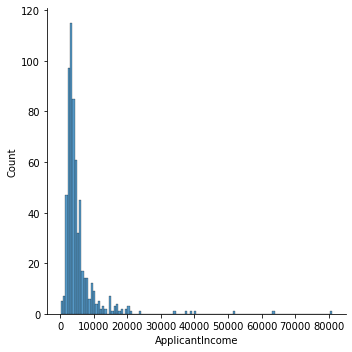

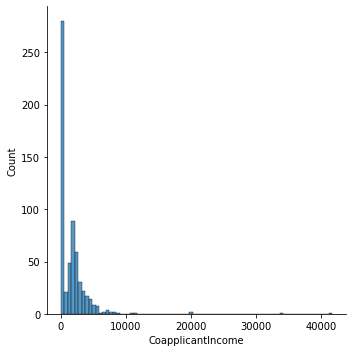

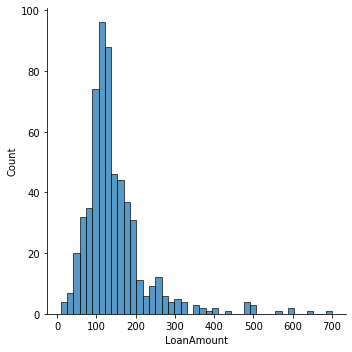

In [ ]:
sns.displot(dataset['ApplicantIncome'])
sns.displot(dataset['CoapplicantIncome'])
sns.displot(dataset['LoanAmount'])

We see that the people who apply for loans generally seem to have a lower income, the majority between 0 and 10,000.

Their co-applicant generally seems to have higher chance of having no income.    This can be explained if we consider that mostly men apply for loans. Hence said co-applicants are probably their home-making wives.


In [ ]:
cleanup_nums = {"Gender":     {"Male": 1, "Female": 2,-99:-99},
                "Dependents": {"0": 0, "1": 1, "2": 2, "3+": 3,-99:-99 },
               "Married": {"Yes": 1, "No": 0,-99:-99 },
                 "Education": {"Graduate": 1, "Not Graduate": 0 },
                "Self_Employed": {"Yes": 1, "No": 0 ,-99:-99},
                "Property_Area":{"Semiurban":1,"Urban":2,"Rural":3},
                "Loan_Status":{"Y":1,"N":0}
               }

In [ ]:
data=dataset.replace(cleanup_nums)

In [ ]:
data = data[numerical+categorical+target].astype(str).astype(float)

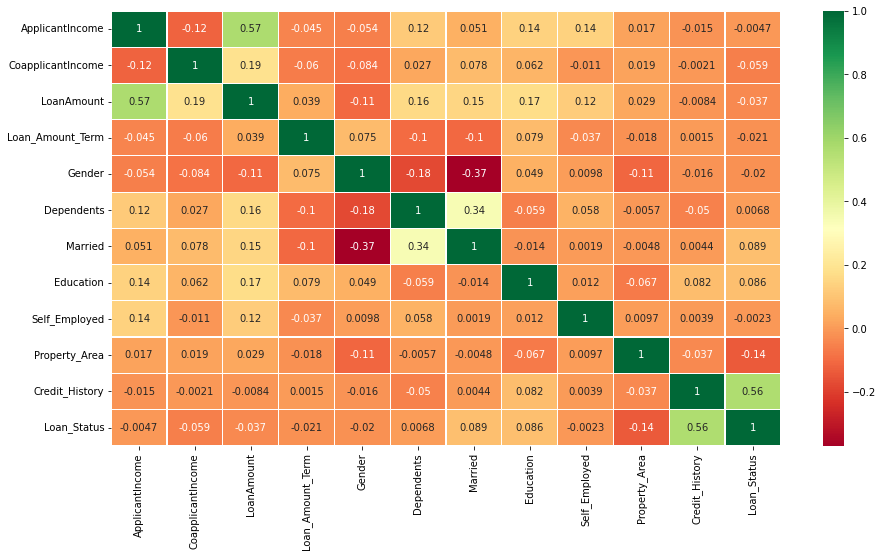

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

Dataset from: https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan


References:https://www.kaggle.com/code/devzohaib/loan-prediction-and-complete-eda
https://www.kaggle.com/code/hongha/predict-approve-reject-loan